In [39]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from RegscorePy import *
from collections import OrderedDict
# import pymc3 as pm

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [25]:
def combine_deep_smf2(low_r,ssfq, affix,z):
    smf = np.load(path+'smf_'+low_r+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf1 = np.load(path+'smf_'+low_r+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2 = np.load(path+'smf_'+low_r+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3 = np.load(path+'smf_'+low_r+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4 = np.load(path+'smf_'+low_r+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return smf+smf1+smf2+smf3+smf4

## Stellar Mass Function of Satellites



188126.0
162309.0
25817.0


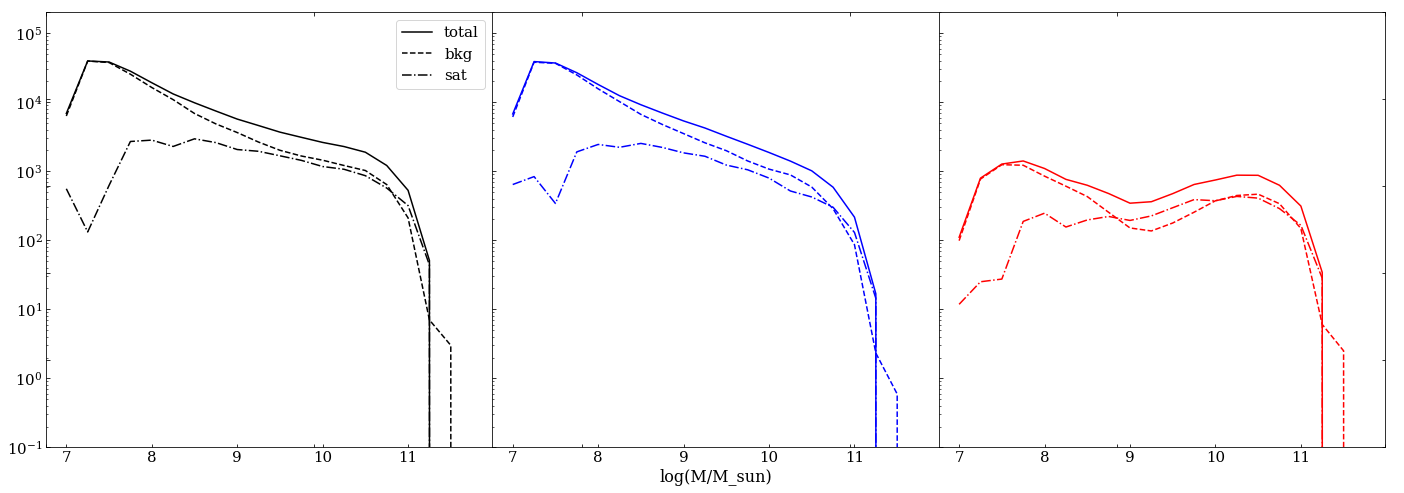

In [27]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,8))

path = 'CUT_deep_catalogs/test_smf/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

z=0.4
low_r='0.0'

#load data
all_total = combine_deep_smf2(low_r,'all','_total',str(z))
all_bkg = combine_deep_smf2(low_r,'all','_bkg',str(z))
all_new = combine_deep_smf2(low_r,'all','_new',str(z))
print(sum(all_total))
print(sum(all_bkg))
print(sum(all_new))

sf_total = combine_deep_smf2(low_r,'ssf','_total',str(z))
sf_bkg = combine_deep_smf2(low_r,'ssf','_bkg',str(z))
sf_new = combine_deep_smf2(low_r,'ssf','_new',str(z))

q_total = combine_deep_smf2(low_r,'sq','_total',str(z))
q_bkg = combine_deep_smf2(low_r,'sq','_bkg',str(z))
q_new = combine_deep_smf2(low_r,'sq','_new',str(z))

# all
axs[0].plot(bin_edges, all_total,'k',label='total')
axs[0].plot(bin_edges, all_bkg,'--k',label='bkg')
axs[0].plot(bin_edges, all_new,'-.k',label='sat')

#sf
axs[1].plot(bin_edges, sf_total,'b')
axs[1].plot(bin_edges, sf_bkg,'--b')
axs[1].plot(bin_edges, sf_new,'-.b')

#q
axs[2].plot(bin_edges, q_total,'r')
axs[2].plot(bin_edges, q_bkg,'--r')
axs[2].plot(bin_edges, q_new,'-.r')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-1,2e5])
axs[0].legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('log(M/M_sun)', fontsize=16)
plt.savefig('figures/smf_total_bkg_sat_'+str(z)+'.png')
plt.show()


Text(0.5, 0, '$\\log(M/M_\\odot)$')

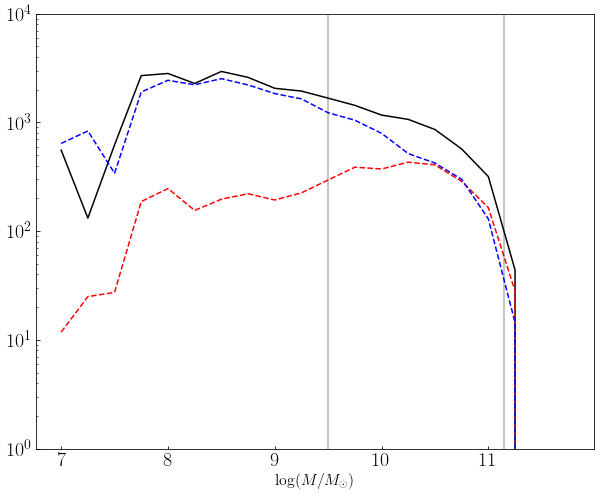

In [40]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,8))


all_new = combine_deep_smf2(low_r,'all','_new',str(z))
sf_new = combine_deep_smf2(low_r,'ssf','_new',str(z))
q_new = combine_deep_smf2(low_r,'sq','_new',str(z))

plt.plot(bin_edges, all_new,'k',label='total')
plt.plot(bin_edges, q_new,'--r',label='q')
plt.plot(bin_edges, sf_new,'--b',label='sf')

plt.plot([11.15,11.15],[1,1e4],'k',alpha=0.3)
plt.plot([9.5,9.5],[1,1e4],'k',alpha=0.3)
plt.ylim([1,1e4])
plt.yscale('log')

plt.xlabel(r'$\log(M/M_\odot)$', fontsize=16)
plt.savefig('figures/smf_sat_'+str(z)+'.png')

266110.3929253394
303224.91036086914
-37114.51743552983


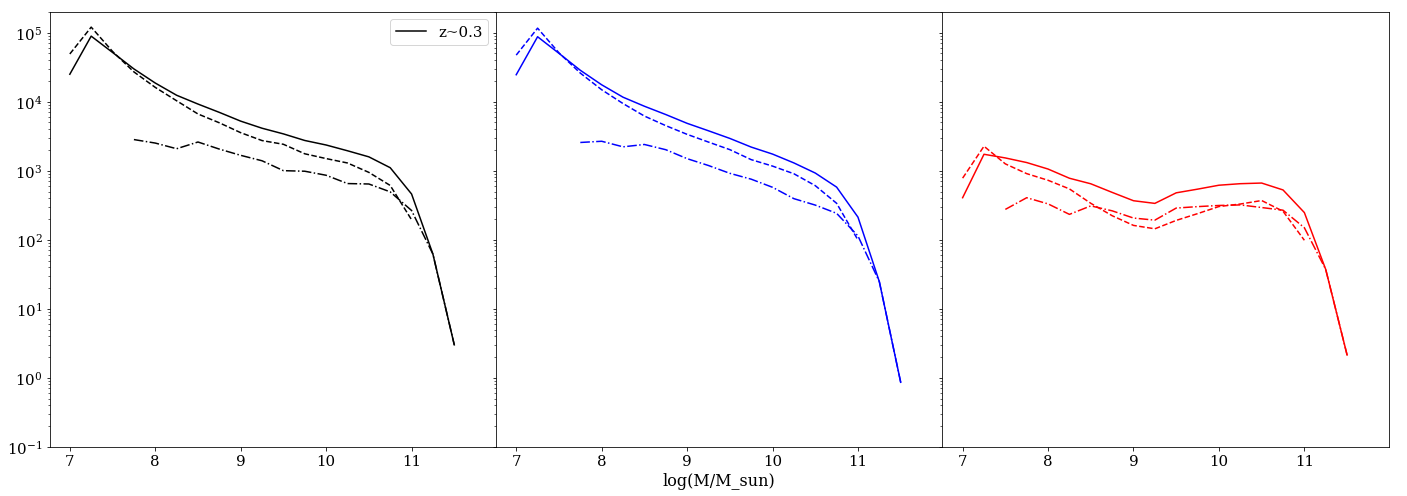

In [21]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,8))

path = 'CUT_deep_catalogs/test_smf/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

#load data
all_total = combine_deep_smf2('all','_total','0.3')
all_bkg = combine_deep_smf2('all','_bkg','0.3')
all_new = combine_deep_smf2('all','_new','0.3')
print(sum(all_total))
print(sum(all_bkg))
print(sum(all_new))
sf_total = combine_deep_smf2('ssf','_total','0.3')
sf_bkg = combine_deep_smf2('ssf','_bkg','0.3')
sf_new = combine_deep_smf2('ssf','_new','0.3')

q_total = combine_deep_smf2('sq','_total','0.3')
q_bkg = combine_deep_smf2('sq','_bkg','0.3')
q_new = combine_deep_smf2('sq','_new','0.3')

# all
axs[0].plot(bin_edges, all_total,'k',label='z~0.3')
axs[0].plot(bin_edges, all_bkg,'--k')
axs[0].plot(bin_edges, all_new,'-.k')

#sf
axs[1].plot(bin_edges, sf_total,'b')
axs[1].plot(bin_edges, sf_bkg,'--b')
axs[1].plot(bin_edges, sf_new,'-.b')

#q
axs[2].plot(bin_edges, q_total,'r')
axs[2].plot(bin_edges, q_bkg,'--r')
axs[2].plot(bin_edges, q_new,'-.r')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-1,2e5])
axs[0].legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('log(M/M_sun)', fontsize=16)
plt.savefig('figures/smf_total_bkg_new_0.3.png')
plt.show()

satellites 50kpc - 700 kpc

In [7]:
def combine_deep_smf3(ssfq, affix,z):
    smf = np.load(path+'smf_50kpc_700kpc_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf1 = np.load(path+'smf_50kpc_700kpc_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2 = np.load(path+'smf_50kpc_700kpc_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3 = np.load(path+'smf_50kpc_700kpc_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4 = np.load(path+'smf_50kpc_700kpc_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return smf+smf1+smf2+smf3+smf4

FileNotFoundError: [Errno 2] No such file or directory: 'CUT_deep_catalogs/test_smf_backup/smf_50kpc_700kpc_COSMOS_deep_7.0_all_all_0.4_total.npy'

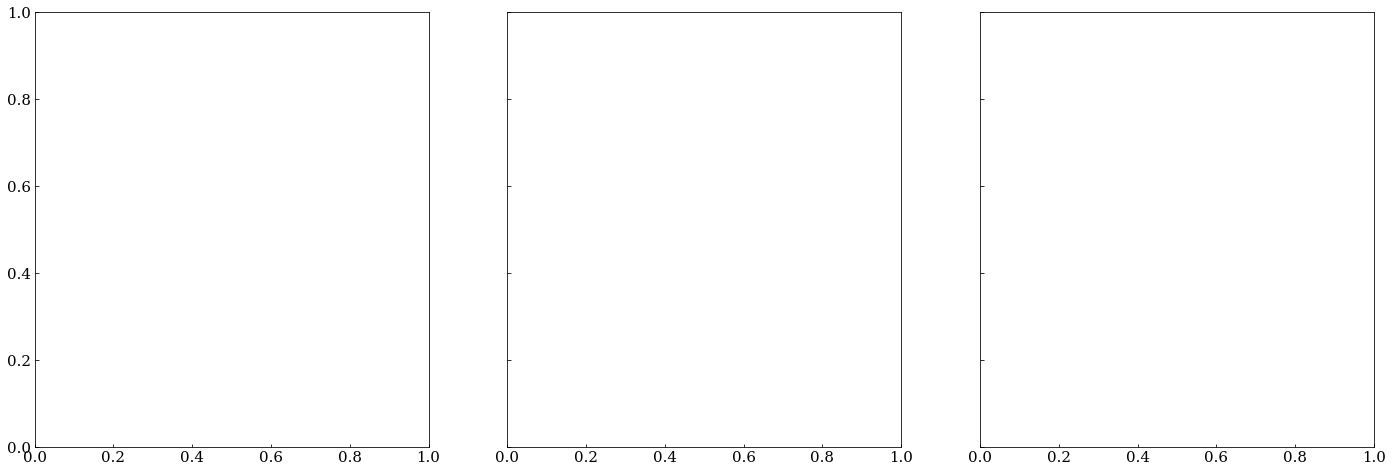

In [10]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,8))

path = 'CUT_deep_catalogs/test_smf_backup/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]
z=0.4

#load data
all_total = combine_deep_smf3('all','_total',str(z))
all_bkg = combine_deep_smf3('all','_bkg',str(z))
all_new = combine_deep_smf3('all','_new',str(z))
print(sum(all_total))
print(sum(all_bkg))
print(sum(all_new))
sf_total = combine_deep_smf3('ssf','_total',str(z))
sf_bkg = combine_deep_smf3('ssf','_bkg',str(z))
sf_new = combine_deep_smf3('ssf','_new',str(z))

q_total = combine_deep_smf3('sq','_total',str(z))
q_bkg = combine_deep_smf3('sq','_bkg',str(z))
q_new = combine_deep_smf3('sq','_new',str(z))

# all
axs[0].plot(bin_edges, all_total,'k',label='z~'+str(z))
axs[0].plot(bin_edges, all_bkg,'--k')
axs[0].plot(bin_edges, all_new,'-.k')

#sf
axs[1].plot(bin_edges, sf_total,'b')
axs[1].plot(bin_edges, sf_bkg,'--b')
axs[1].plot(bin_edges, sf_new,'-.b')

#q
axs[2].plot(bin_edges, q_total,'r')
axs[2].plot(bin_edges, q_bkg,'--r')
axs[2].plot(bin_edges, q_new,'-.r')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-1,2e5])
axs[0].legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('log(M/M_sun)', fontsize=16)
plt.show()

## Completeness Curve

In [7]:
import matplotlib

masscut_low = '9.0'
masscut_high = '9.5'
path = 'completeness_curve/curves/'
comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_0.6_'+masscut_low+'_'+masscut_high+'.txt')
comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_ssf_0.6_'+masscut_low+'_'+masscut_high+'.txt')
comp_q_50 = np.genfromtxt(path+'comp_bootstrap_sq_0.6_'+masscut_low+'_'+masscut_high+'.txt')
bin_edges = np.load(path+'bin_edges.npy')[:-1]

comp_all = np.median(comp_all_50, axis=0)
comp_all_l = np.percentile(comp_all_50,16, axis=0)
comp_all_h = np.percentile(comp_all_50,84, axis=0)

comp_sf = np.median(comp_sf_50, axis=0)
comp_sf_l = np.percentile(comp_sf_50,16, axis=0)
comp_sf_h = np.percentile(comp_sf_50,84, axis=0)

comp_q = np.median(comp_q_50, axis=0)
comp_q_l = np.percentile(comp_q_50,16, axis=0)
comp_q_h = np.percentile(comp_q_50,84, axis=0)

np.save(path+'comp_bootstrap_all_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_all)
np.save(path+'comp_bootstrap_ssf_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_sf)
np.save(path+'comp_bootstrap_sq_0.6_'+masscut_low+'_'+masscut_high+'_median',comp_q)

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))
axs.plot(bin_edges,comp_all,'k',label='all')
axs.fill_between(bin_edges,comp_all_l,comp_all_h,color='k',alpha=0.2)

axs.plot(bin_edges,comp_sf,'b',label='sf')
axs.fill_between(bin_edges,comp_sf_l,comp_sf_h,color='b',alpha=0.2)

axs.plot(bin_edges,comp_q,'r',label='q')
axs.fill_between(bin_edges,comp_q_l,comp_q_h,color='r',alpha=0.2)

axs.annotate('z~0.6',(5,10), fontsize=14, xycoords='axes points')
axs.annotate(masscut_low+'<M<'+masscut_high,(5,25), fontsize=14, xycoords='axes points')

axs.set_xticks([20, 100, 400])
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

axs.legend(fontsize=15,loc='lower right')
axs.set_ylim([0,1])
axs.set_xlim([10,520])
axs.set_xscale('log')
axs.set_xlabel('Projected Distance [kpc]',fontsize=15)
axs.set_ylabel('Completeness',fontsize=15)

plt.savefig('figures/completeness_0.6_'+masscut_low+'_'+masscut_high+'.png')
plt.show()

IOError: completeness_curve/curves/comp_bootstrap_all_0.6_9.0_9.5.txt not found.

## Completeness around sf/q centrals

In [8]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,6))

path = './completeness_curve/'
comp_all_cq = np.genfromtxt(path+'comp_bootstrap_cq_all_0.6.txt')
comp_ssf_cq = np.genfromtxt(path+'comp_bootstrap_cq_ssf_0.6.txt')
comp_sq_cq = np.genfromtxt(path+'comp_bootstrap_cq_sq_0.6.txt')

comp_all_csf = np.genfromtxt(path+'comp_bootstrap_csf_all_0.6.txt')
comp_ssf_csf = np.genfromtxt(path+'comp_bootstrap_csf_ssf_0.6.txt')
comp_sq_csf = np.genfromtxt(path+'comp_bootstrap_csf_sq_0.6.txt')

bin_edges = np.load(path+'bin_edges.npy')[:-1]

axs[0].plot(bin_edges,comp_all_cq,'k',label='all')
axs[0].plot(bin_edges,comp_ssf_cq,'b',label='all')
axs[0].plot(bin_edges,comp_sq_cq,'r',label='all')
axs[0].set_title('Quiesecent Central', fontsize=16)

axs[1].plot(bin_edges,comp_all_csf,'k',label='all')
axs[1].plot(bin_edges,comp_ssf_csf,'b',label='all')
axs[1].plot(bin_edges,comp_sq_csf,'r',label='all')
axs[1].set_title('Star-Forming Central', fontsize=16)

axs[0].set_ylabel('Completeness',fontsize=16)
axs[0].set_xlabel('Projected Distance [kpc]',fontsize=16)
axs[1].set_xlabel('Projected Distance [kpc]',fontsize=16)

axs[0].set_xscale('log')
axs[0].set_xlim([10,520])  
axs[0].set_ylim([0,1])   
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()

IOError: ./completeness_curve/comp_bootstrap_cq_all_0.6.txt not found.

## Completeness Curve Mosaic

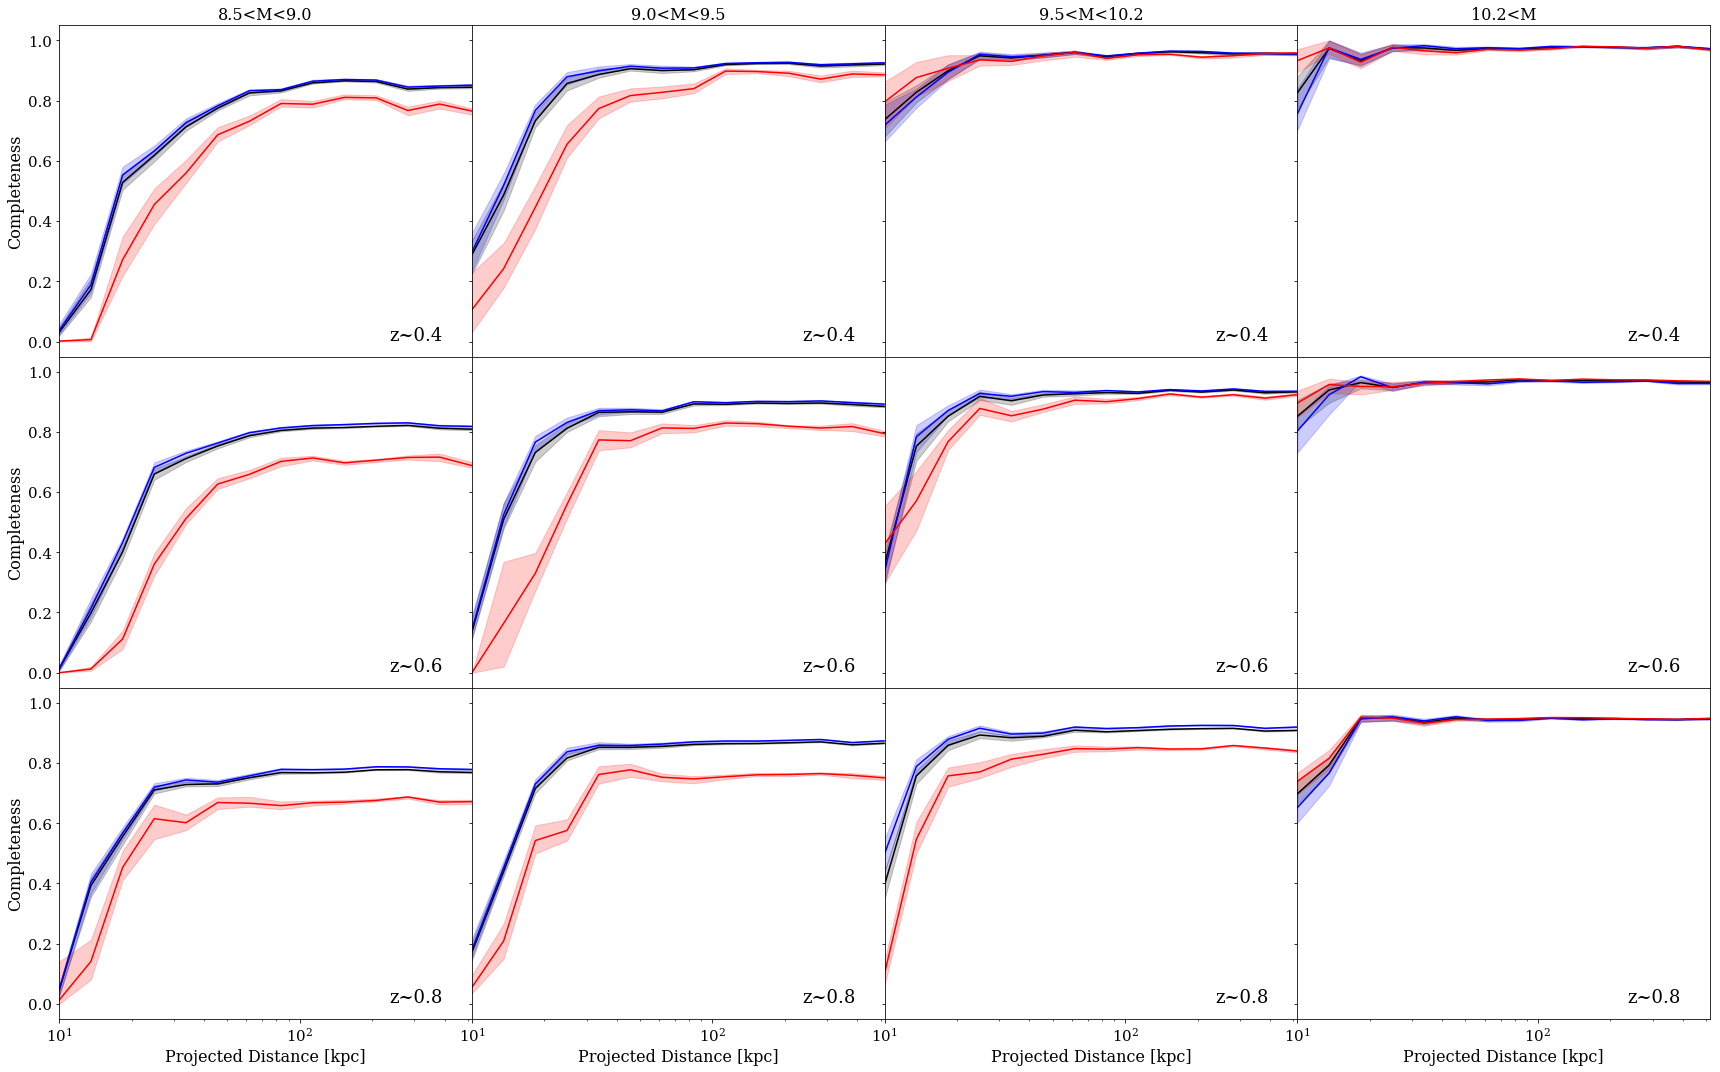

In [8]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(24,15))

mass_bins = ['8.5', '9.0', '9.5', '10.2', '13.0']
path = 'completeness_curve/curves_graham/'
bin_edges = np.load('CUT_deep_catalogs/split_host_mass/bin_edges.npy')[:-1]
for i in range(3):
    axs[i][0].set_ylabel('Completeness',fontsize=16)
    for j in range(4):
        z = 0.4 + i*0.2
        z_low = round(z-0.1,1)
        z_high = round(z+0.1,1)
        
        masscut_low = mass_bins[j]
        masscut_high = mass_bins[j+1]
        try:
            comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_all_'+masscut_low+'_'+masscut_high+'_'
                                    +str(z_low)+'_'+str(z_high)+'.txt')
            comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_all_ssf_'+masscut_low+'_'+masscut_high+'_'
                                   +str(z_low)+'_'+str(z_high)+'.txt')
            comp_q_50 = np.genfromtxt(path+'comp_bootstrap_all_sq_'+masscut_low+'_'+masscut_high+'_'
                                  +str(z_low)+'_'+str(z_high)+'.txt')
        except IOError:
            comp_all_50 = np.genfromtxt(path+'comp_bootstrap_all_all_'
                                    +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            comp_sf_50 = np.genfromtxt(path+'comp_bootstrap_all_ssf_'
                                   +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            comp_q_50 = np.genfromtxt(path+'comp_bootstrap_all_sq_'
                                  +str(z_low)+'_'+str(z_high)+'_'+masscut_low+'_'+masscut_high+'.txt')
            
        comp_all = np.median(comp_all_50, axis=0)
        comp_all_l = np.percentile(comp_all_50,16, axis=0)
        comp_all_h = np.percentile(comp_all_50,84, axis=0)

        comp_sf = np.median(comp_sf_50, axis=0)
        comp_sf_l = np.percentile(comp_sf_50,16, axis=0)
        comp_sf_h = np.percentile(comp_sf_50,84, axis=0)

        comp_q = np.median(comp_q_50, axis=0)
        comp_q_l = np.percentile(comp_q_50,16, axis=0)
        comp_q_h = np.percentile(comp_q_50,84, axis=0)
        
        axs[i][j].plot(bin_edges,comp_all,'k',label='all')
        axs[i][j].fill_between(bin_edges,comp_all_l,comp_all_h,color='k',alpha=0.2)
        
        axs[i][j].plot(bin_edges,comp_sf,'b',label='sf')
        axs[i][j].fill_between(bin_edges,comp_sf_l,comp_sf_h,color='b',alpha=0.2)
        
        axs[i][j].plot(bin_edges,comp_q,'r',label='q')
        axs[i][j].fill_between(bin_edges,comp_q_l,comp_q_h,color='r',alpha=0.2)
        
        axs[i][j].annotate('z~'+str(round(z,1)),(0.80,0.05), fontsize=18, xycoords='axes fraction')
        axs[2][j].set_xlabel('Projected Distance [kpc]',fontsize=16)
        
axs[0][0].set_title('8.5<M<9.0',fontsize=16) 
axs[0][1].set_title('9.0<M<9.5',fontsize=16) 
axs[0][2].set_title('9.5<M<10.2',fontsize=16) 
axs[0][3].set_title('10.2<M',fontsize=16) 

axs[0][0].set_xscale('log')
axs[0][0].set_xlim([10,520])    

plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/comp_curve_mosaic.png',dpi=150)
plt.show()

## Test Bkg

In [45]:
def combine_deep_testbkg(csfq, ssfq, masscut_low, z, path, bkg_type):
    path = path
    try:
        affix = '_' + bkg_type + '_' + str(masscut_low) + '_' +str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    except IOError:
        affix = '_' + bkg_type + '_' + str(masscut_low) + '_' +str(csfq) + '_' + str(ssfq) + '_' + str(round(z, 1))+'.txt'
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    radial_cosmos = cosmos_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_sxds = sxds_uddd[1:((len(cosmos_deep)-1)/2)+1]
    radial_elais = elais_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_xmmlss = xmmlss_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_deep = deep_deep[1:((len(cosmos_deep)-1)/2)+1]
    radial_combine = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_sxds_err = sxds_uddd[((len(cosmos_deep)-1)/2)+1:]
    radial_elais_err = elais_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_xmmlss_err = xmmlss_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_deep_err = deep_deep[((len(cosmos_deep)-1)/2)+1:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err)

[ 6.11470605e-09  4.82578615e-09  3.54024183e-08  5.91797022e-09
  1.85094144e-08  2.72242312e-08  3.34923923e-08  5.29983271e-08
  6.96791182e-08  4.02885391e-08 -1.64719125e-08 -1.19938403e-08
 -9.54300120e-09  1.33265486e-08]


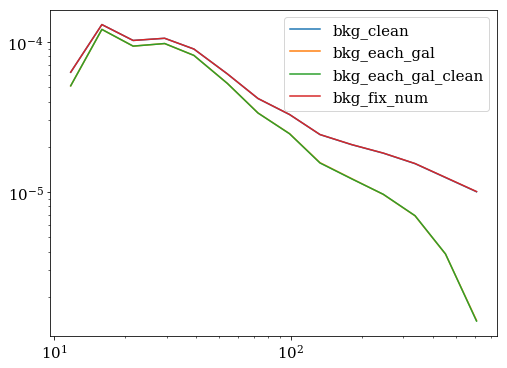

In [80]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))

path= 'CUT_deep_catalogs/test_bkg/'
radial_bkg_clean = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_clean')
radial_bkg_each_gal = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_each_gal')
radial_bkg_each_gal_clean = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_each_gal_clean')
radial_bkg_fix_num = combine_deep_testbkg('all', 'all', 9.5, 0.6, path, bkg_type='bkg_fix_num')
bin_centers = np.load(path+'bin_centers.npy')

axs.plot(bin_centers, radial_bkg_clean[0],label='bkg_clean')
axs.plot(bin_centers, radial_bkg_each_gal[0],label='bkg_each_gal')
axs.plot(bin_centers, radial_bkg_each_gal_clean[0],label='bkg_each_gal_clean')
axs.plot(bin_centers, radial_bkg_fix_num[0],label='bkg_fix_num')

axs.set_yscale('log')
axs.set_xscale('log')
axs.legend(fontsize=15)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()